In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from openpmd_viewer import OpenPMDTimeSeries

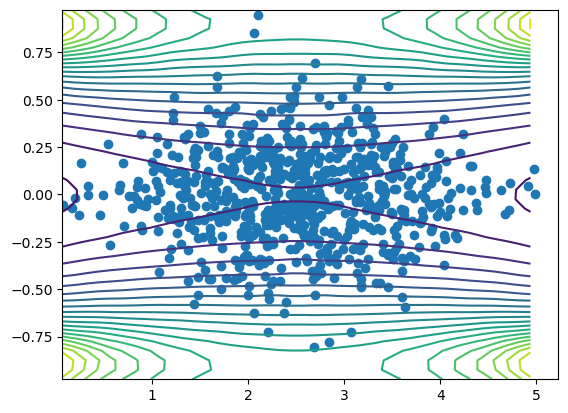

In [2]:
diag_dir = "diags/diag1"
series = OpenPMDTimeSeries(diag_dir)
iterations = series.iterations

it = iterations[-1]

Bx, info = series.get_field('B', coord='x', iteration=it, slice_across='y')
By, info = series.get_field('B', coord='y', iteration=it, slice_across='y')
Bz, info = series.get_field('B', coord='z', iteration=it, slice_across='y')

B = np.sqrt(Bx**2 + By**2 + Bz**2)

x,y,z = series.get_particle(['x','y','z'], iteration=it, species="protons")

plt.contour(info.z, info.x, B, levels=20)
plt.scatter(z,x)
plt.show()

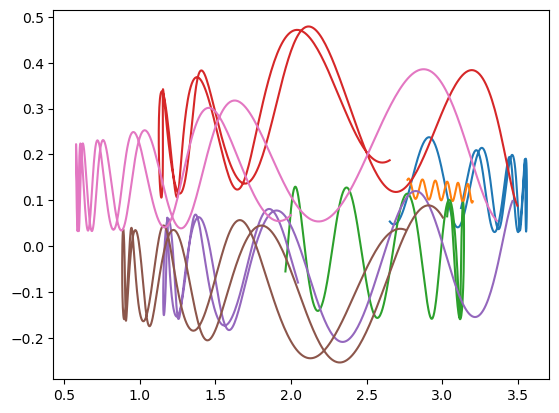

In [18]:
from openpmd_viewer import ParticleTracker
pt = ParticleTracker( series, iteration=iterations[-1], select={'z':[3,3.5], 'x':[0.05, 0.1]}, species='protons', preserve_particle_index=True)
N_particles = pt.N_selected
N_iterations = len(iterations)

x_trajectories =  np.empty( ( N_iterations, N_particles ) )
z_trajectories = np.empty( ( N_iterations, N_particles ) )
for i, it in enumerate( iterations ):
    x, z = series.get_particle( ['x', 'z'], select=pt, iteration=it, species='protons' )
    x_trajectories[i, :] = x[:]
    z_trajectories[i, :] = z[:]


plt.plot(z_trajectories, x_trajectories)
plt.show()